### GEOG0051

Mining Social and Geographic Datasets
-----------------------------------

Coursework Part Two 
-------------------------------

Stephen Law and Nikki Tanu

## 3 Machine Learning Analysis with Venue Review Data 

## in Calgary, Canada

For the second task, we would like you to analyse a dataset that contains review data of different venues in the city of Calgary, Canada. With the help of several machine learning techniques that we have learnt in the course, you will be tasked to distill insights from this social media dataset.  Two of its notable features are the geocoding of every reviewed venues and the availability of a considerable amount of text data in it, which lend to its ability to be processed using spatial and text analysis techniques respectively. 

As a prelude to the analysis prompts below, have a brief think about some of these questions: What can we discover about the venue review data? Are there any spatial patterns that can be extracted from the data? Can we build a machine learning model that predicts review rating for unseen data points using the text of the reviews? Are there certain tendencies in the sentiment of the reviews based on certain factors?

### 3.1 Format of Data

The variables contained in the dataset provided in a .csv file, are:

* `latitude`, `longitude`, i.e. the locational attributes of the venue. <br/>
* `reviewcount` or the number of reviews the venue has been given<br/>
* `categories` general category of establishment that a venue falls under 
(Note: this variable is rather messy and might needs some cleaning/consolidation to be usable)<br/>
* `hours` or the opening hours of the venue <br/>
* `reviewid` unique identifier of the review <br/>
* `userid` unique identifier of the individual who left the review<br/>
* `starsy` individual ratings of the venue<br/>
* `useful`, `funny`, `cool`, `text`, i.e. tags that the user attached to the review<br/>
* `date` i.e. the date of the review<br/>

### 3.2 Analysis Prompts

### 3.2.1 Loading and cleaning the dataset

In a realistic context, most text datasets are messy in their raw forms.  They require considerable data cleaning before any analysis can be conducted and, not unlike data cleaning for non-textual datasets, this would include the removal of invalid data, missing values, and outliers. In this first prompt you will be required to complete the tasks stated below to prepare the dataset for subsequent analysis.

*  Load and understand the dataset.
*  Think about which attributes you will use / focus on (in subsequent prompts) and check its data distribution.
*  Pre-process the text review data and create a new column in the data frame which will hold the cleaned review data.
*  Some of the steps to consider are: removal of numbers, punctuation, short words, stopwords, lemmatise words, etc. 


```
Example Pipeline
for each review in geoDataFrame:
    # removes all numbers (hint: re)
    # removes all punctuations (hint: re)
    # removes short words (hint: re
    # tokenize words (hint:nltk)
    # removes stopwords (hint: nltk)
    # lemmatize (hint: nltk)
    # rejoin as sent
    # cleantxt = sent
```

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
# suppress warning 
import warnings
warnings.filterwarnings(action='ignore')

#### 3.2.1.1 Load and understand the dataset

In [3]:
#load dataset
rawdf = pd.read_csv('df_Calgary_pre.csv')
len(rawdf)#82182
rawdf.head(n=1)
rawdf.describe()

,latitude,longitude,review_count,stars_y,useful,funny,cool
count,82182.000000,82182.000000,82182.000000,82182.000000,82182.000000,82182.000000,82182.000000
mean,51.042724,-114.070648,61.995254,3.618639,1.293203,0.391083,0.382578
std,0.051552,0.053040,77.290191,1.424214,2.830347,1.306604,1.171075
min,50.865169,-114.379523,3.000000,1.000000,0.000000,0.000000,0.000000
25%,51.033200,-114.086896,13.000000,3.000000,0.000000,0.000000,0.000000
50%,51.044727,-114.070254,36.000000,4.000000,0.000000,0.000000,0.000000
75%,51.066428,-114.053056,78.000000,5.000000,2.000000,0.000000,0.000000
max,51.207540,-113.714140,512.000000,5.000000,104.000000,59.000000,69.000000


#### 3.2.1.2 Think about which attributes will be used and check its data distribution

In [4]:
df = rawdf.copy()
df = df.drop_duplicates()
df = df[['name','categories','latitude','longitude','review_count',
        'stars_y','useful','funny','cool','text','date']]
len(df['categories'].unique()) #3861
len(df['name'].unique()) #4331
df.head(n=3)

,name,categories,latitude,longitude,review_count,stars_y,useful,funny,cool,text,date
0,Chinook Landscaping and Design,"Contractors, Landscaping, Home Services",50.94596,-114.037207,3,5.0,1,0,0,David came in the spring to give me an estimat...,2017-08-16 01:10:52
1,Chinook Landscaping and Design,"Contractors, Landscaping, Home Services",50.94596,-114.037207,3,5.0,0,0,0,Chinook Landscaping is a Company that I would ...,2014-06-15 21:09:06
2,Chinook Landscaping and Design,"Contractors, Landscaping, Home Services",50.94596,-114.037207,3,5.0,0,0,0,Chinook Landscaping is tops in my book\nI was ...,2013-08-22 22:10:38


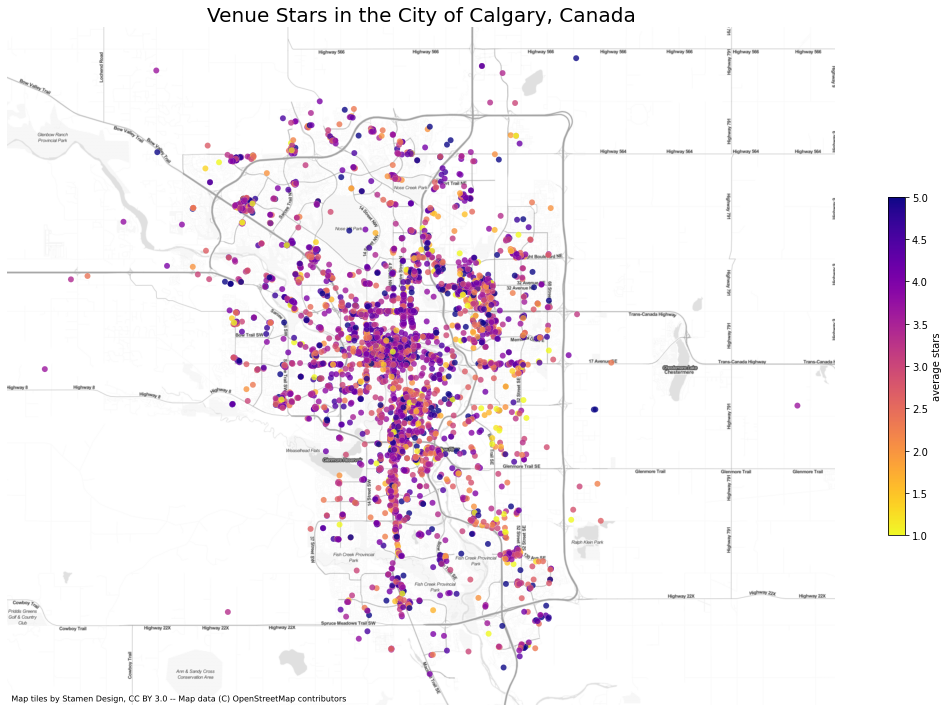

In [5]:
dfsub = df.groupby('name').mean()
dfsub = dfsub.reset_index()
len(dfsub) #4331
dfsub.head(n=3)
dfsub.describe()

gdf = gpd.GeoDataFrame(dfsub, geometry=gpd.points_from_xy(dfsub.longitude, dfsub.latitude))
gdf =gdf.set_crs(epsg=4326)
gdf =gdf.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
houseplot=gdf.plot(figsize=(8, 8), alpha=0.8, linewidth=0.1,
                edgecolor='w',ax=ax,
                column='stars_y', colormap = 'plasma_r',legend=True,vmin=1,vmax=5,
                legend_kwds={'label': "average stars",'shrink': 0.5})

# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.8)

ax.set_title("Venue Stars in the City of Calgary, Canada",fontsize= 20)

# this removes the axis
ax.set_axis_off()

# this tightens the layout
fig.tight_layout()
fig.savefig("figure/star rating.png", bbox_inches='tight', pad_inches=0, dpi=300)

In [6]:
dfsub = dfsub.iloc[:][['name','latitude','longitude',
                     'review_count','stars_y']]
dfsub2 = df.groupby('name').sum()
dfsub2 = dfsub2.reset_index()
dfsub2 = dfsub2.iloc[:][['name','useful','funny','cool']]
data = dfsub.merge(dfsub2, on = 'name')
data['index'] = data.index
len(data) #4331
textdf = df[['name','text']]
indexdf = data[['name','index']]
data1 = textdf.merge(indexdf, on = 'name')
datatext = data1[['index','text']]
datatext.head()

,index,text
0,900,David came in the spring to give me an estimat...
1,900,Chinook Landscaping is a Company that I would ...
2,900,Chinook Landscaping is tops in my book\nI was ...
3,3206,If you are looking for a supplier of games tab...
4,3206,"SML is now a personal wet dream of mine, the e..."


In [7]:
data2 = np.array(datatext.groupby(['index']))
'''
array([[0,
               index                                               text
64170      0  I've been in here a few times now and spent ov...
64171      0  An entire bunch of excellent guys. Ken replace...
64172      0  Fantastic experience - most knowledgeable tech...],...
'''
all_value = []
idlist = []
for j in range(4331):
    idlist.append(j)
    value = []
    for i in data2[j][1]['text']:
        value.append(str(i))
    all_value.append(value)

new_data = pd.DataFrame({'index':idlist,'text':all_value})
alldata = data.merge(new_data, on = 'index')
alldata.set_index('index', inplace=True)
alldata.head(n=3) #4331

,name,latitude,longitude,review_count,stars_y,useful,funny,cool,text
index,,,,,,,,,
0,007 Airsoft,51.082219,-114.009783,3.0,4.000000,2,1,0,[I've been in here a few times now and spent o...
1,1 Pot,51.050175,-114.060360,36.0,3.277778,77,30,29,[Quality of food 4/5 yelps\nVariety 4/5 yelps ...
2,1-800-GOT-JUNK? Calgary,51.085142,-114.179499,11.0,2.545455,23,4,4,[Did you know that this company charges you by...


In [8]:
alldata['review']=np.NaN
for i in range(len(alldata)):
    str = ''
    text = list(alldata.iloc[i][['text']])[0]
    text = str.join(text)
    alldata.loc[i,'review'] = text
alldata.head(n=2)

,name,latitude,longitude,review_count,stars_y,useful,funny,cool,text,review
index,,,,,,,,,,
0,007 Airsoft,51.082219,-114.009783,3.0,4.000000,2,1,0,[I've been in here a few times now and spent o...,I've been in here a few times now and spent ov...
1,1 Pot,51.050175,-114.060360,36.0,3.277778,77,30,29,[Quality of food 4/5 yelps\nVariety 4/5 yelps ...,Quality of food 4/5 yelps\nVariety 4/5 yelps s...


#### 3.2.1.3  Pre-process the text review data and create a new column in the data frame which will hold the cleaned review data.

Some of the steps to consider are: removal of numbers, punctuation, short words, stopwords, lemmatise words, etc.


```
Example Pipeline
for each review in geoDataFrame:
    # removes all numbers (hint: re)
    # removes all punctuations (hint: re)
    # removes short words (hint: re
    # tokenize words (hint:nltk)
    # removes stopwords (hint: nltk)
    # lemmatize (hint: nltk)
    # rejoin as sent
    # cleantxt = sent
```
Source: https://towardsdatascience.com/cleaning-text-data-with-python-b69b47b97b76

In [9]:
import re
import nltk
import string
from nltk.corpus import stopwords

In [10]:
stop_words = stopwords.words("english")
def text_preproc(x):
    x = x.lower()
    x = x.encode('ascii', 'ignore').decode()
    x = ' '.join([word for word in x.split(' ') if word not in stop_words])# Remove stop words
    x = re.sub(r'https*\S+', ' ', x) # Remove URL
    x = re.sub(r'@\S+', ' ', x) # Remove mentions
    x = re.sub(r'#\S+', ' ', x) # Remove Hashtags
    x = re.sub(r'\'\w+', '', x) # Remove ticks and the next character
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)# Remove punctuations
    x = re.sub(r'\w*\d+\w*', '', x) # Remove numbers
    x = re.sub(r'\s{2,}', ' ', x) # Replace the over spaces
    return x

In [11]:
alldata['clean_text']=np.NaN
for i in range(len(alldata)):
    text = alldata.iloc[i]['review']
    text = text_preproc(text)
    alldata.loc[i,'clean_text'] = text
alldata.head(n=2)

,name,latitude,longitude,review_count,stars_y,useful,funny,cool,text,review,clean_text
index,,,,,,,,,,,
0,007 Airsoft,51.082219,-114.009783,3.0,4.000000,2,1,0,[I've been in here a few times now and spent o...,I've been in here a few times now and spent ov...,i times spent them primarily two airsoft guns ...
1,1 Pot,51.050175,-114.060360,36.0,3.277778,77,30,29,[Quality of food 4/5 yelps\nVariety 4/5 yelps ...,Quality of food 4/5 yelps\nVariety 4/5 yelps s...,quality food yelps\nvariety yelps see much lar...


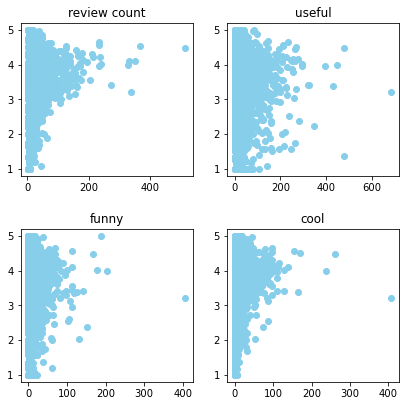

In [12]:
fig, ax = plt.subplots(2, 2,figsize=(6,6))  
ax[0][0].set_title('review count')
ax[0][0].scatter(alldata['review_count'],alldata['stars_y'],c='skyblue',marker='o')
ax[0][1].set_title('useful')
ax[0][1].scatter(alldata['useful'],alldata['stars_y'],c='skyblue',marker='o')

ax[1][0].set_title('funny')
ax[1][0].scatter(alldata['funny'],alldata['stars_y'],c='skyblue',marker='o')
ax[1][1].set_title('cool')
ax[1][1].scatter(alldata['cool'],alldata['stars_y'],c='skyblue',marker='o')

fig.tight_layout(pad=2.0)

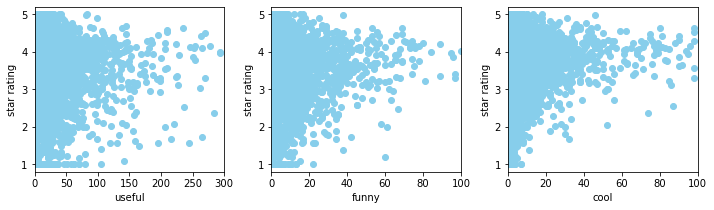

In [13]:
fig, ax = plt.subplots(1,3,figsize=(10,3))  
ax[0].scatter(alldata['useful'],alldata['stars_y'],c='skyblue',marker='o')
ax[0].set_xlim([0,300])
ax[0].set_xlabel('useful')
ax[0].set_ylabel('star rating')
ax[1].scatter(alldata['funny'],alldata['stars_y'],c='skyblue',marker='o')
ax[1].set_xlim([0,100])
ax[1].set_xlabel('funny')
ax[1].set_ylabel('star rating')
ax[2].scatter(alldata['cool'],alldata['stars_y'],c='skyblue',marker='o')
ax[2].set_xlim([0,100])
ax[2].set_xlabel('cool')
ax[2].set_ylabel('star rating')
fig.tight_layout(pad=1.0)
plt.savefig("figure/tags_scatter.png",dpi=300)

In [14]:
import math
# alldata.iloc[2]['review'] + int(math.log(alldata.iloc[2]['useful']))*' useful' + int(math.log(alldata.iloc[2]['funny']))*' funny'

In [15]:
alldata['clean_text_tag']=np.NaN
for i in range(len(alldata)):
    text = alldata.iloc[i]['review']
    tag = int(math.log(alldata.iloc[i]['useful']+1))*' useful' + int(math.log(alldata.iloc[i]['funny']+1))*' funny' + int(math.log(alldata.iloc[i]['cool']+1))*' cool'
    text = text + tag
    text = text_preproc(text)
    alldata.loc[i,'clean_text_tag'] = text 
alldata.head(n=2)

,name,latitude,longitude,review_count,stars_y,useful,funny,cool,text,review,clean_text,clean_text_tag
index,,,,,,,,,,,,
0,007 Airsoft,51.082219,-114.009783,3.0,4.000000,2,1,0,[I've been in here a few times now and spent o...,I've been in here a few times now and spent ov...,i times spent them primarily two airsoft guns ...,i times spent them primarily two airsoft guns ...
1,1 Pot,51.050175,-114.060360,36.0,3.277778,77,30,29,[Quality of food 4/5 yelps\nVariety 4/5 yelps ...,Quality of food 4/5 yelps\nVariety 4/5 yelps s...,quality food yelps\nvariety yelps see much lar...,quality food yelps\nvariety yelps see much lar...


####  Label categories

* 1~2 (<=2)
* 2~3
* 3~4
* 4~5

In [16]:
clist = []
for i in range(4331):
    if float(alldata.iloc[i][['stars_y']]) > 4:
        c = '4~5'
    elif float(alldata.iloc[i][['stars_y']]) > 3:
        c = '3~4'
    elif float(alldata.iloc[i][['stars_y']]) > 2:
        c = '2~3'
    else:
        c = '1~2'
    clist.append(c)
alldata['categories'] = clist
alldata.head(n=2)

,name,latitude,longitude,review_count,stars_y,useful,funny,cool,text,review,clean_text,clean_text_tag,categories
index,,,,,,,,,,,,,
0,007 Airsoft,51.082219,-114.009783,3.0,4.000000,2,1,0,[I've been in here a few times now and spent o...,I've been in here a few times now and spent ov...,i times spent them primarily two airsoft guns ...,i times spent them primarily two airsoft guns ...,3~4
1,1 Pot,51.050175,-114.060360,36.0,3.277778,77,30,29,[Quality of food 4/5 yelps\nVariety 4/5 yelps ...,Quality of food 4/5 yelps\nVariety 4/5 yelps s...,quality food yelps\nvariety yelps see much lar...,quality food yelps\nvariety yelps see much lar...,3~4


In [17]:
counts = {}         
for x in list(alldata.iloc[:]['categories']):            
    if x in counts:
        counts[x] += 1
    else:
        counts[x] = 1
count_df = pd.DataFrame(counts,index=[0]).T
count_df = count_df.reset_index()
count_df.columns = ['categories','count']
# change order based on time
count_df = count_df.sort_values(by='count',axis=0,
                                ascending=False, inplace=False, 
                                na_position='last')
count_df

,categories,count
0,3~4,1697
3,4~5,1333
1,2~3,886
2,1~2,415


In [18]:
alldata.to_csv("created_datasets/alldata.csv",index=False,sep=',')

In [19]:
notna = alldata[['categories','useful','funny','cool']]
notna.set_index('categories', inplace=True)
notna = notna[notna.apply(np.sum,axis=1)!=0]
len(notna) #4113
notna = notna.reset_index()

In [20]:
counts = {}         
for x in list(notna.iloc[:]['categories']):            
    if x in counts:
        counts[x] += 1
    else:
        counts[x] = 1
count_df = pd.DataFrame(counts,index=[0]).T
count_df = count_df.reset_index()
count_df.columns = ['categories','count']
# change order based on time
count_df = count_df.sort_values(by='count',axis=0,
                                ascending=False, inplace=False, 
                                na_position='last')
# 390;854;1639;1230

In [21]:
# average tag number (only consider those with tags)
label = alldata[['categories']]
comment = alldata[['useful','funny','cool']]
for i in range(len(alldata)):
    if label.iloc[i]['categories'] == '1~2':
        comment.iloc[i] = comment.iloc[i]/390
    elif label.iloc[i]['categories'] == '2~3':
        comment.iloc[i] = comment.iloc[i]/854
    elif label.iloc[i]['categories'] == '3~4':
        comment.iloc[i] = comment.iloc[i]/1639
    else:
        comment.iloc[i] = comment.iloc[i]/1230
describe = np.concatenate((label, comment), axis=1)
describe = pd.DataFrame(describe)
describe.columns = ['categories','useful','funny','cool']
describeorder = describe.groupby('categories').sum()
describeorder = describeorder.reset_index()
describeorder 

,categories,useful,funny,cool
0,1~2,22.846154,3.951282,1.415385
1,2~3,22.524590,6.590164,3.927400
2,3~4,28.887736,9.422209,9.277608
3,4~5,25.028455,7.746341,10.023577


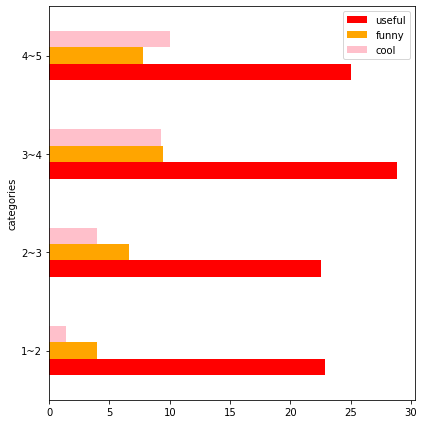

In [22]:
color_list = {'useful':'red','funny':'orange','cool':'pink'}
describeorder.plot(x="categories",kind='barh',
                   figsize=(6,6),color=color_list) 
plt.tight_layout()  
plt.savefig("figure/tags.png",dpi=300)
plt.show()

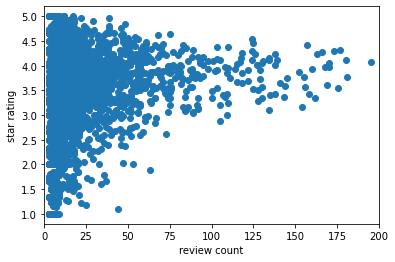

In [23]:
plt.scatter(alldata['review_count'],alldata['stars_y'])
plt.xlim(0,200)
plt.xlabel('review count')
plt.ylabel('star rating')
plt.show()

### 3.2.2 Build a supervised learning model for text analysis
The objective of this sub-task is to build a machine learning model that predicts the build a supervised learning model that predicts the **mean star ratings for individual venues**, based on the different features of each review included in the dataset. You are expected to use a combination of **text** and **non-text** features, and below are some guidelines that you could follow:

*  Firstly, vectorise the preprocessed review text data to give text features you can used in your model.

* Split your dataset into a train and test-set and train 2 different machine learning models, varying either features used (E.g.bag of words features vs TF-IDF features) or choice of model, where the target of prediction is the mean rating of each venue.

*  Report the mean-squared-error (MSE) and R2-score on the mean rating of the holdout test set.

*  Discuss and interpret the results you obtained.



In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [25]:
model_data = []
for i in range(4331):
    text = list(alldata.iloc[i][['clean_text']])[0]
    star = alldata.iloc[i][['categories']]
    model_data.append([text, star])

X = []
y = []

for features,label in model_data:
    X.append(features)
    y.append(label)

In [26]:
model_data = []
for i in range(4331):
    text = list(alldata.iloc[i][['clean_text_tag']])[0]
    star = alldata.iloc[i][['categories']]
    model_data.append([text, star])

X_tag = []
y_tag = []

for features,label in model_data:
    X_tag.append(features)
    y_tag.append(label)

In [27]:
X[1] #string
y[1] #3~4

categories    3~4
Name: 1, dtype: object

### Naive Bayes Classifier

### CountVectorizer

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [29]:
no_features = [400, 500]
max_dfs = [0.75, 0.85, 0.95]

for no_feature in no_features:
    for max_df in max_dfs:
        NAME = "{}-no_feature-{}-max_df".format(no_feature,max_df)
        print(NAME)

        tf_vectorizer = CountVectorizer(max_df=max_df, 
                                        min_df=2, 
                                        max_features=no_feature, 
                                        stop_words='english',
                                        lowercase=True)
        tf_vectorizer.fit_transform(X)
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
        x_train_vectors = tf_vectorizer.transform(x_train)
        x_test_vectors = tf_vectorizer.transform(x_test)    

        ### this fit the Naive Bayes Classifier
        clf = MultinomialNB()
        clf.fit(x_train_vectors, y_train)

        # this uses the Naive Bayes Classifier to predict
        y_pred1 = clf.predict(x_test_vectors)
        # this prints the f1_score 
        print (f"F1 SCORE for prediction 1:{f1_score(y_test, y_pred1, average='macro')}")
        print (f"Accuracy for prediction 1:{accuracy_score(y_test, y_pred1)}")

400-no_feature-0.75-max_df
F1 SCORE for prediction 1:0.39410845711675824
Accuracy for prediction 1:0.4129181084198385
400-no_feature-0.85-max_df
F1 SCORE for prediction 1:0.39556343247658554
Accuracy for prediction 1:0.41522491349480967
400-no_feature-0.95-max_df
F1 SCORE for prediction 1:0.39556343247658554
Accuracy for prediction 1:0.41522491349480967
500-no_feature-0.75-max_df
F1 SCORE for prediction 1:0.3874381746343285
Accuracy for prediction 1:0.40484429065743943
500-no_feature-0.85-max_df
F1 SCORE for prediction 1:0.39288894927664036
Accuracy for prediction 1:0.4129181084198385
500-no_feature-0.95-max_df
F1 SCORE for prediction 1:0.39288894927664036
Accuracy for prediction 1:0.4129181084198385


In [30]:
no_features = 500
#turns text data into feature vectors
tf_vectorizer = CountVectorizer(max_df=0.85, 
                                min_df=2, 
                                max_features=no_features, 
                                stop_words='english',
                                lowercase=True)
tf_vectorizer.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
x_train_vectors = tf_vectorizer.transform(x_train)
x_test_vectors = tf_vectorizer.transform(x_test)

In [31]:
### this fit the Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(x_train_vectors, y_train)

# this uses the Naive Bayes Classifier to predict
y_pred1 = clf.predict(x_test_vectors)

In [32]:
# this prints the f1_score 
print (f"F1 SCORE for prediction 1:{f1_score(y_test, y_pred1, average='macro')}")
print (f"Accuracy for prediction 1:{accuracy_score(y_test, y_pred1)}")

F1 SCORE for prediction 1:0.39288894927664036
Accuracy for prediction 1:0.4129181084198385


In [33]:
# test the confusion matrix (test ticklabels)
results = confusion_matrix(y_test, y_pred1)
print(results)
count = 0
test = pd.DataFrame(y_test)
y_test_list = []
for i in range(len(test)):
    element = test.iloc[i]['categories']
    y_test_list.append(element)
for i in range(len(y_test_list)):
    if y_test_list[i] == '3~4':
        if y_test_list[i] == y_pred1[i]:
            count += 1
count

[[ 62   5   3   0]
 [ 87  38  41   5]
 [ 77  70 124  76]
 [ 61  63  21 134]]


124

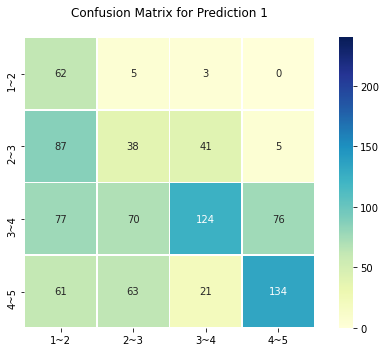

In [34]:
#creates a grid to plot on
f, ax = plt.subplots(figsize=(7, 5))
#plots confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred1),
            annot=True, fmt="d", linewidths=.5, 
            cmap="YlGnBu",vmin=0, vmax=240,
            xticklabels=['1~2','2~3','3~4','4~5'], 
            yticklabels=['1~2','2~3','3~4','4~5'],
            square=True)
plt.title('Confusion Matrix for Prediction 1' +'\n')
plt.tight_layout()
plt.savefig('figure/Confusion Matrix for Prediction 1',dpi=300)
plt.show()

### Term Frequency, Inverse Document Frequency (TF-IDF)¶

In [35]:
no_features = [400, 500]
max_dfs = [0.75, 0.85, 0.95]

for no_feature in no_features:
    for max_df in max_dfs:
        NAME = "{}-no_feature-{}-max_df".format(no_feature,max_df)
        print(NAME)

        tfid_vectorizer = TfidfVectorizer(max_df=max_df, 
                                        min_df=2, 
                                        max_features=no_feature, 
                                        stop_words='english',
                                        lowercase=True)
        tf_vectorizer.fit_transform(X)
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
        tfid_vectorizer.fit_transform(X)
        x_train_vectors = tfid_vectorizer.transform(x_train)
        x_test_vectors = tfid_vectorizer.transform(x_test)  

        ### this fit the Naive Bayes Classifier
        clf = MultinomialNB()
        clf.fit(x_train_vectors, y_train)

        # this uses the Naive Bayes Classifier to predict
        y_pred2 = clf.predict(x_test_vectors)
        # this prints the f1_score 
        print (f"F1 SCORE for prediction 2:{f1_score(y_test, y_pred2, average='macro')}")
        print (f"Accuracy for prediction 2:{accuracy_score(y_test, y_pred2)}")

400-no_feature-0.75-max_df
F1 SCORE for prediction 2:0.5015865055961702
Accuracy for prediction 2:0.5236447520184544
400-no_feature-0.85-max_df
F1 SCORE for prediction 2:0.5115895635043842
Accuracy for prediction 2:0.5351787773933102
400-no_feature-0.95-max_df
F1 SCORE for prediction 2:0.5115895635043842
Accuracy for prediction 2:0.5351787773933102
500-no_feature-0.75-max_df
F1 SCORE for prediction 2:0.5156630471066223
Accuracy for prediction 2:0.538638985005767
500-no_feature-0.85-max_df
F1 SCORE for prediction 2:0.5248613425871589
Accuracy for prediction 2:0.5490196078431373
500-no_feature-0.95-max_df
F1 SCORE for prediction 2:0.5248613425871589
Accuracy for prediction 2:0.5490196078431373


In [36]:
no_features = 500
#turns text data into feature vectors
tfid_vectorizer = TfidfVectorizer(max_df=0.85, 
                                  min_df=2, 
                                  max_features=no_features, 
                                  stop_words='english',
                                  lowercase=True)
tfid_vectorizer.fit_transform(X)
x_train_vectors = tfid_vectorizer.transform(x_train)
x_test_vectors = tfid_vectorizer.transform(x_test)

In [37]:
clf = MultinomialNB()
clf.fit(x_train_vectors, y_train)

# this uses the Naive Bayes Classifier to predict
y_pred2 = clf.predict(x_test_vectors)

# this prints the f1_score 
print (f"F1 SCORE for prediction 2:{f1_score(y_test, y_pred2, average='macro')}")
print (f"Accuracy for prediction 2:{accuracy_score(y_test, y_pred2)}")

F1 SCORE for prediction 2:0.5248613425871589
Accuracy for prediction 2:0.5490196078431373


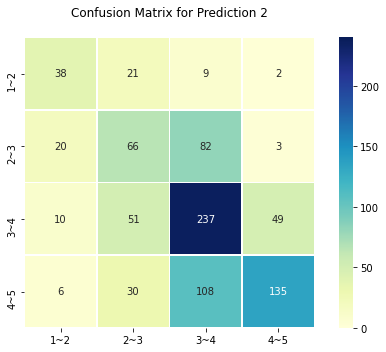

In [38]:
#creates a grid to plot on
f, ax = plt.subplots(figsize=(7, 5))
#plots confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred2),
            annot=True, fmt="d", linewidths=.5, 
            cmap="YlGnBu",vmin=0, vmax=240,
            xticklabels=['1~2','2~3','3~4','4~5'], 
            yticklabels=['1~2','2~3','3~4','4~5'],
            square=True)
plt.title('Confusion Matrix for Prediction 2' +'\n')
plt.tight_layout()
plt.savefig('figure/Confusion Matrix for Prediction 2',dpi=300)
plt.show()

### Same analysis for text data considering tags

In [39]:
no_features = [400, 500]
max_dfs = [0.75, 0.85, 0.95]

for no_feature in no_features:
    for max_df in max_dfs:
        NAME = "{}-no_feature-{}-max_df".format(no_feature,max_df)
        print(NAME)

        tf_vectorizer = CountVectorizer(max_df=max_df, 
                                        min_df=2, 
                                        max_features=no_feature, 
                                        stop_words='english',
                                        lowercase=True)
        tf_vectorizer.fit_transform(X_tag)
        x_train2, x_test2, y_train2, y_test2 = train_test_split(X_tag, y_tag, test_size = 0.20, random_state = 1)
        x_train_vectors2 = tf_vectorizer.transform(x_train2)
        x_test_vectors2 = tf_vectorizer.transform(x_test2)


        ### this fit the Naive Bayes Classifier
        clf = MultinomialNB()
        clf.fit(x_train_vectors2, y_train2)

        # this uses the Naive Bayes Classifier to predict
        y_pred3 = clf.predict(x_test_vectors2)

        # this prints the f1_score 
        print (f"F1 SCORE for prediction 3:{f1_score(y_test2, y_pred3, average='macro')}")
        print (f"Accuracy for prediction 3:{accuracy_score(y_test2, y_pred3)}")

400-no_feature-0.75-max_df
F1 SCORE for prediction 3:0.3944887532778203
Accuracy for prediction 3:0.4129181084198385
400-no_feature-0.85-max_df
F1 SCORE for prediction 3:0.3928634191087722
Accuracy for prediction 3:0.4117647058823529
400-no_feature-0.95-max_df
F1 SCORE for prediction 3:0.39447780554113687
Accuracy for prediction 3:0.4129181084198385
500-no_feature-0.75-max_df
F1 SCORE for prediction 3:0.3872411260588373
Accuracy for prediction 3:0.40484429065743943
500-no_feature-0.85-max_df
F1 SCORE for prediction 3:0.39079170248740924
Accuracy for prediction 3:0.41061130334486734
500-no_feature-0.95-max_df
F1 SCORE for prediction 3:0.38744714910652317
Accuracy for prediction 3:0.4071510957324106


In [40]:
no_features = 500
#turns text data into feature vectors
tf_vectorizer = CountVectorizer(max_df=0.85, 
                                min_df=2, 
                                max_features=no_features, 
                                stop_words='english',
                                lowercase=True)
tf_vectorizer.fit_transform(X_tag)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_tag, y_tag, test_size = 0.20, random_state = 1)
x_train_vectors2 = tf_vectorizer.transform(x_train2)
x_test_vectors2 = tf_vectorizer.transform(x_test2)


### this fit the Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(x_train_vectors2, y_train2)

# this uses the Naive Bayes Classifier to predict
y_pred3 = clf.predict(x_test_vectors2)

# this prints the f1_score 
print (f"F1 SCORE for prediction 3:{f1_score(y_test2, y_pred3, average='macro')}")
print (f"Accuracy for prediction 3:{accuracy_score(y_test2, y_pred3)}")

F1 SCORE for prediction 3:0.39079170248740924
Accuracy for prediction 3:0.41061130334486734


In [41]:
x_train == x_train2

False

In [42]:
list(x_test) == list(x_test2)

False

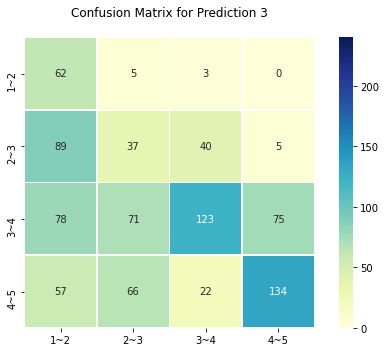

In [43]:
#creates a grid to plot on
f, ax = plt.subplots(figsize=(7, 5))
#plots confusion matrix
sns.heatmap(confusion_matrix(y_test2, y_pred3),
            annot=True, fmt="d", linewidths=.5, 
            cmap="YlGnBu",vmin=0, vmax=240,
            xticklabels=['1~2','2~3','3~4','4~5'], 
            yticklabels=['1~2','2~3','3~4','4~5'],
            square=True)
plt.title('Confusion Matrix for Prediction 3' +'\n')
plt.tight_layout()
plt.savefig('figure/Confusion Matrix for Prediction 3',dpi=300)
plt.show()

In [44]:
no_features = [400, 500]
max_dfs = [0.75, 0.85, 0.95]

for no_feature in no_features:
    for max_df in max_dfs:
        NAME = "{}-no_feature-{}-max_df".format(no_feature,max_df)
        print(NAME)

        tfid_vectorizer = TfidfVectorizer(max_df=max_df, 
                                          min_df=2, 
                                          max_features=no_feature, 
                                          stop_words='english',
                                          lowercase=True)
        tfid_vectorizer.fit_transform(X_tag)
        x_train_vectors2 = tfid_vectorizer.transform(x_train2)
        x_test_vectors2 = tfid_vectorizer.transform(x_test2)

        clf = MultinomialNB()
        clf.fit(x_train_vectors2, y_train2)

        # this uses the Naive Bayes Classifier to predict
        y_pred4 = clf.predict(x_test_vectors2)

        # this prints the f1_score 
        print (f"F1 SCORE for prediction 4:{f1_score(y_test2, y_pred4, average='macro')}")
        print (f"Accuracy for prediction 4:{accuracy_score(y_test2, y_pred4)}")

400-no_feature-0.75-max_df
F1 SCORE for prediction 4:0.5058926661632025
Accuracy for prediction 4:0.5282583621683967
400-no_feature-0.85-max_df
F1 SCORE for prediction 4:0.5130562324741987
Accuracy for prediction 4:0.5363321799307958
400-no_feature-0.95-max_df
F1 SCORE for prediction 4:0.5121018263309569
Accuracy for prediction 4:0.5340253748558247
500-no_feature-0.75-max_df
F1 SCORE for prediction 4:0.5151254598650608
Accuracy for prediction 4:0.5374855824682814
500-no_feature-0.85-max_df
F1 SCORE for prediction 4:0.5300303849298009
Accuracy for prediction 4:0.5536332179930796
500-no_feature-0.95-max_df
F1 SCORE for prediction 4:0.5314693314006972
Accuracy for prediction 4:0.5536332179930796


In [45]:
no_features = 500
#turns text data into feature vectors
tfid_vectorizer = TfidfVectorizer(max_df=0.85, 
                                  min_df=2, 
                                  max_features=no_features, 
                                  stop_words='english',
                                  lowercase=True)
tfid_vectorizer.fit_transform(X_tag)
x_train_vectors2 = tfid_vectorizer.transform(x_train2)
x_test_vectors2 = tfid_vectorizer.transform(x_test2)

clf = MultinomialNB()
clf.fit(x_train_vectors2, y_train2)

# this uses the Naive Bayes Classifier to predict
y_pred4 = clf.predict(x_test_vectors2)

# this prints the f1_score 
print (f"F1 SCORE for prediction 4:{f1_score(y_test2, y_pred4, average='macro')}")
print (f"Accuracy for prediction 4:{accuracy_score(y_test2, y_pred4)}")

F1 SCORE for prediction 4:0.5300303849298009
Accuracy for prediction 4:0.5536332179930796


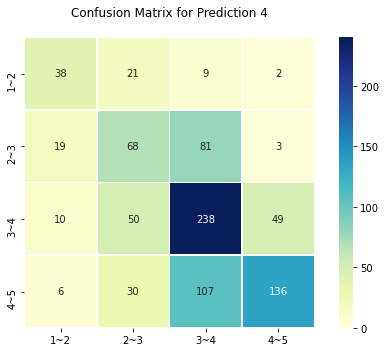

In [46]:
#creates a grid to plot on
f, ax = plt.subplots(figsize=(7, 5))
#plots confusion matrix
sns.heatmap(confusion_matrix(y_test2, y_pred4),
            annot=True, fmt="d", linewidths=.5, 
            cmap="YlGnBu",vmin=0, vmax=240,
            xticklabels=['1~2','2~3','3~4','4~5'], 
            yticklabels=['1~2','2~3','3~4','4~5'],
            square=True)
plt.title('Confusion Matrix for Prediction 4' +'\n')
plt.tight_layout()
plt.savefig('figure/Confusion Matrix for Prediction 4',dpi=300)
plt.show()

### 3.2.3. Geographic visualisation with geopandas and folium

Having explored the dataset, its constituent variables and coverage above, the objective of this sub-task is for you to visualise any of the spatial patterns that emerge from the data that you find interesting. This task is intentionally open-ended and leaves you with some choice. To achieve this, you should:

* Choose 1 or 2 variables (including any variables you generated from 3.2.2) that you wish to explore and from the list of variables available in the dataset

* Use either or both of the geopandas and folium libraries in Python to produce up to 3 visualisations

* Comment on the spatial distributions of the 1-2 variables you chose, any trends or outliers that emerge and if they haveany notable implications.

* **Note**: You may use any subset of the dataset instead of the entire dataset, but comment on why you chose this subset.


In [47]:
def X_data(col):
    model_data = []
    for i in range(4331):
        text = list(alldata.iloc[i][[col]])[0]
        star = alldata.iloc[i][['categories']]
        model_data.append([text, star])

    X = []
    y = []

    for features,label in model_data:
        X.append(features)
        y.append(label)
    return X

In [48]:
def tf_vect(col):
    
    X = X_data(col)
    tf_vectorizer = CountVectorizer(max_df=0.85, 
                                    min_df=2, 
                                    max_features=500, 
                                    stop_words='english',
                                    lowercase=True)
    tf_vectorizer.fit_transform(X)
    
    return X
    # X
    # ["..."]

In [49]:
def add_geo(testdata, col, df):
    X = tf_vect(col)
    df['latitude']=np.NaN
    df['longitude']=np.NaN
    for i in range(4331):
        for j in range(len(testdata)): #867
            if X[i] == testdata[j]:
                df.loc[j, 'latitude'] = float(alldata.iloc[i][['latitude']])
                df.loc[j, 'longitude'] = float(alldata.iloc[i][['longitude']])
            else:
                pass
        else:
            pass

    return df

In [50]:
# test and predicted values
df1 = pd.DataFrame(y_test)
df2 = pd.DataFrame(y_pred1)
df3 = pd.DataFrame(y_pred2)
df_all = np.concatenate((df1, df2, df3), axis=1)
df_all = pd.DataFrame(df_all)
df_all.columns = ['test','pred_1','pred_2']

In [51]:
# add latidtude and longitude
df_all = add_geo(x_test, 'clean_text',df_all)
df_all.isnull().sum()
df_all = df_all.dropna(axis=0, how='any', thresh=None, 
                       subset=None, inplace=False)

In [52]:
df_all.to_csv("created_datasets/plot data.csv",index=False,sep=',')

In [53]:
# test and predicted values
df4 = pd.DataFrame(y_test2)
df5 = pd.DataFrame(y_pred3)
df6 = pd.DataFrame(y_pred4)
df_all_tag = np.concatenate((df4, df5, df6), axis=1)
df_all_tag = pd.DataFrame(df_all_tag)
df_all_tag.columns = ['test','pred_3','pred_4']

In [54]:
# add latidtude and longitude
df_all_tag = add_geo(x_test2, 'clean_text_tag', df_all_tag)
df_all_tag.isnull().sum()
df_all_tag = df_all_tag.dropna(axis=0, how='any', thresh=None, 
                               subset=None, inplace=False)
# 867 (df_all_tag)

In [55]:
df_all_tag.to_csv("created_datasets/plot data tag.csv",index=False,sep=',')

### Plot actual values and predicted values for test dataset

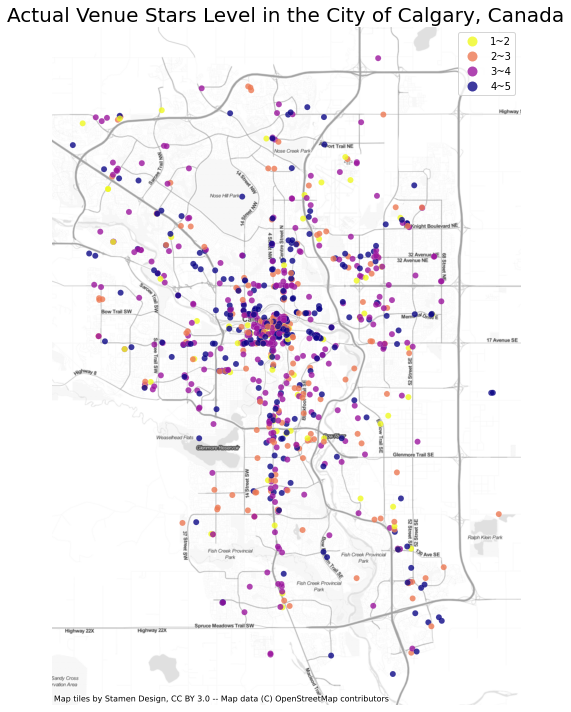

In [56]:
gdf = gpd.GeoDataFrame(df_all, geometry=gpd.points_from_xy(df_all.longitude, df_all.latitude))
gdf =gdf.set_crs(epsg=4326)
gdf =gdf.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
houseplot=gdf.plot(figsize=(8, 8), alpha=0.8, linewidth=0.1,
                edgecolor='w',ax=ax,
                column='test', colormap = 'plasma_r',legend=True)

# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.8)

ax.set_title("Actual Venue Stars Level in the City of Calgary, Canada",fontsize= 20)

# this removes the axis
ax.set_axis_off()

# this tightens the layout
fig.tight_layout()

fig.savefig("figure/Actual Venue Stars Level.png", bbox_inches='tight', pad_inches=0, dpi=300)

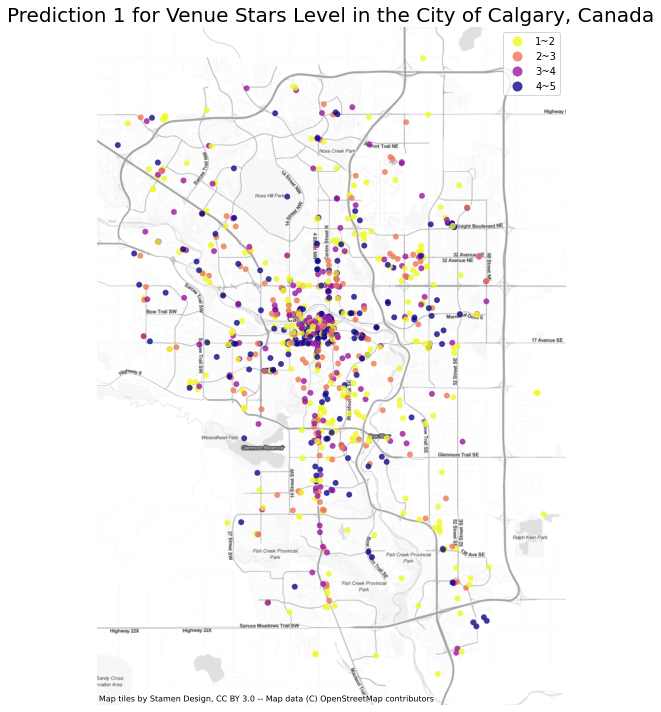

In [57]:
gdf = gpd.GeoDataFrame(df_all, geometry=gpd.points_from_xy(df_all.longitude, df_all.latitude))
gdf =gdf.set_crs(epsg=4326)
gdf =gdf.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
houseplot=gdf.plot(figsize=(8, 8), alpha=0.8, linewidth=0.1,
                edgecolor='w',ax=ax,
                column='pred_1', colormap = 'plasma_r',legend=True)

# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.8)

ax.set_title("Prediction 1 for Venue Stars Level in the City of Calgary, Canada",fontsize= 20)

# this removes the axis
ax.set_axis_off()

# this tightens the layout
fig.tight_layout()

fig.savefig("figure/Prediction 1 for Venue Stars Level.png", bbox_inches='tight', pad_inches=0, dpi=300)

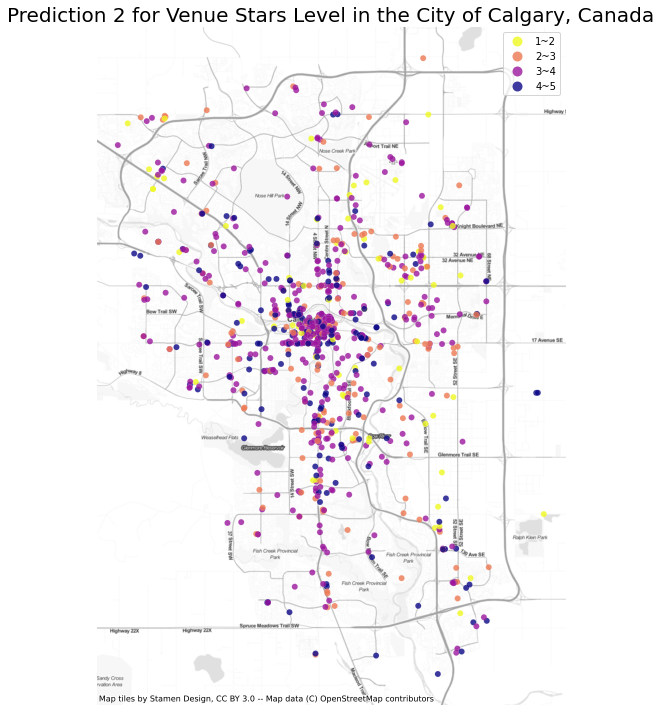

In [58]:
gdf = gpd.GeoDataFrame(df_all, geometry=gpd.points_from_xy(df_all.longitude, df_all.latitude))
gdf =gdf.set_crs(epsg=4326)
gdf =gdf.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
houseplot=gdf.plot(figsize=(8, 8), alpha=0.8, linewidth=0.1,
                edgecolor='w',ax=ax,
                column='pred_2', colormap = 'plasma_r',legend=True)

# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.8)

ax.set_title("Prediction 2 for Venue Stars Level in the City of Calgary, Canada",fontsize= 20)

# this removes the axis
ax.set_axis_off()

# this tightens the layout
fig.tight_layout()

fig.savefig("figure/Prediction 2 for Venue Stars Level.png", bbox_inches='tight', pad_inches=0, dpi=300)

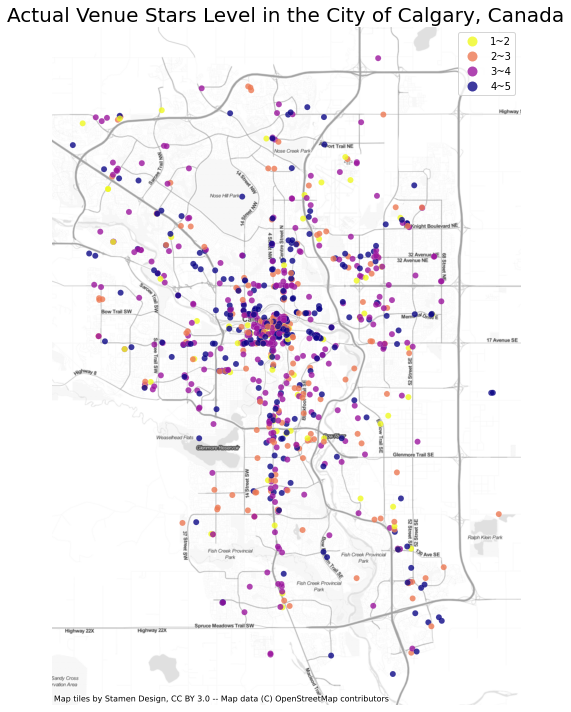

In [59]:
gdf = gpd.GeoDataFrame(df_all_tag, geometry=gpd.points_from_xy(df_all_tag.longitude, df_all_tag.latitude))
gdf =gdf.set_crs(epsg=4326)
gdf =gdf.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
houseplot=gdf.plot(figsize=(8, 8), alpha=0.8, linewidth=0.1,
                edgecolor='w',ax=ax,
                column='test', colormap = 'plasma_r',legend=True)

# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.8)

ax.set_title("Actual Venue Stars Level in the City of Calgary, Canada",fontsize= 20)

# this removes the axis
ax.set_axis_off()

# this tightens the layout
fig.tight_layout()

fig.savefig("figure/Actual Venue Stars Level (tag).png", bbox_inches='tight', pad_inches=0, dpi=300)

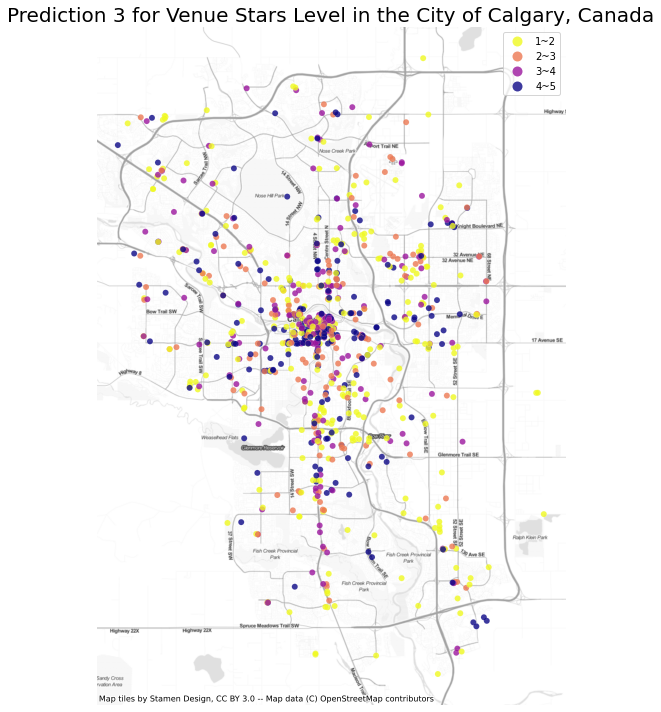

In [60]:
gdf = gpd.GeoDataFrame(df_all_tag, geometry=gpd.points_from_xy(df_all_tag.longitude, df_all_tag.latitude))
gdf =gdf.set_crs(epsg=4326)
gdf =gdf.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
houseplot=gdf.plot(figsize=(8, 8), alpha=0.8, linewidth=0.1,
                edgecolor='w',ax=ax,
                column='pred_3', colormap = 'plasma_r',legend=True)

# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.8)

ax.set_title("Prediction 3 for Venue Stars Level in the City of Calgary, Canada",fontsize= 20)

# this removes the axis
ax.set_axis_off()

# this tightens the layout
fig.tight_layout()

fig.savefig("figure/Prediction 3 for Venue Stars Level.png", bbox_inches='tight', pad_inches=0, dpi=300)

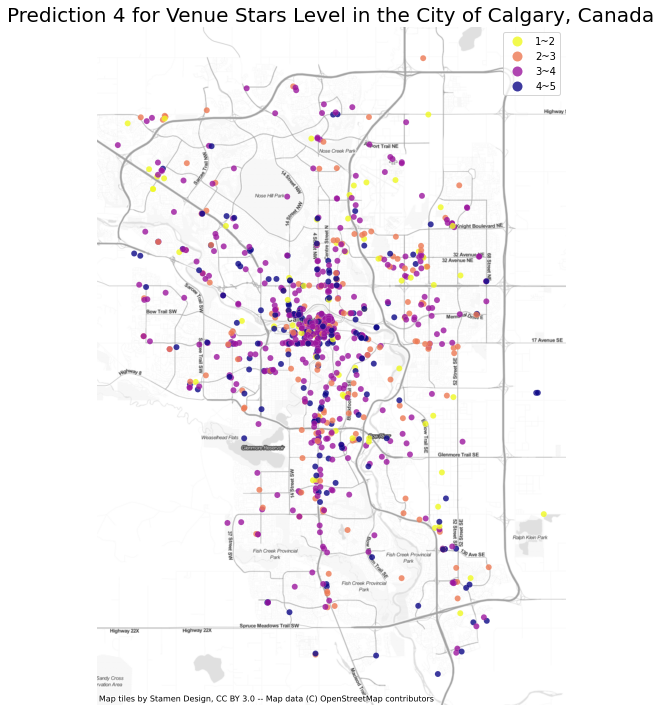

In [61]:
gdf = gpd.GeoDataFrame(df_all_tag, geometry=gpd.points_from_xy(df_all_tag.longitude, df_all_tag.latitude))
gdf =gdf.set_crs(epsg=4326)
gdf =gdf.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
houseplot=gdf.plot(figsize=(8, 8), alpha=0.8, linewidth=0.1,
                edgecolor='w',ax=ax,
                column='pred_4', colormap = 'plasma_r',legend=True)

# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.8)

ax.set_title("Prediction 4 for Venue Stars Level in the City of Calgary, Canada",fontsize= 20)

# this removes the axis
ax.set_axis_off()

# this tightens the layout
fig.tight_layout()

fig.savefig("figure/Prediction 4 for Venue Stars Level.png", bbox_inches='tight', pad_inches=0, dpi=300)

### 3.2.4 Extra task (Optional)

For extra marks, you could choose 1 of EITHER:

(a) Use a pretrained neural word embedding method (ie. `word2vec`) for the supervised learning task and compare the results with the bag of words features, OR,

(b) Apply topic modelling (eg. `LDA`) on the text data and give a characterisation of each of the topics that your topic model generates. Comment briefly on whether these characterisations were roughly what you expected before, OR,

(c) Run a lexicon-based sentiment analysis (eg. `NLTK Vader Sentiment Analyser`) on the textual data, then report and discuss the results. Does the average lexicon sentiment score for each venue correlate with the average venue ratings provided by the users?

### Sentiment Analysis

In [62]:
import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.corpus import stopwords

In [63]:
df = alldata.copy()
sid = SentimentIntensityAnalyzer()
nltk.download('stopwords')
all_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/huoanni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
df['length'] = df['review'].str.len()
df=df[df['length']>5] #4331

df['Positive_sentiment']=np.NaN
for review in df.iterrows():
    sent=review[1]['review']
    sent=nltk.word_tokenize(sent)
    sent=[i for i in sent if not i in all_stopwords]
    sent=' '.join(sent)
    ps=sid.polarity_scores(sent)
    df.loc[review[0],'Positive_sentiment']=ps['compound']

In [65]:
df.to_csv("created_datasets/positive sentiment.csv",index=False,sep=',')
df.describe()

,latitude,longitude,review_count,stars_y,useful,funny,cool,length,Positive_sentiment
count,4331.000000,4331.000000,4331.00000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000
mean,51.039400,-114.068467,16.23213,3.486990,24.538906,7.420919,7.259524,12252.047795,0.871399
std,0.055875,0.059415,28.27121,0.974999,40.407629,15.548595,16.273715,21941.412082,0.439037
min,50.865169,-114.379523,3.00000,1.000000,0.000000,0.000000,0.000000,346.000000,-0.999400
25%,51.012312,-114.092592,3.00000,2.881176,4.000000,0.000000,0.000000,2293.000000,0.987700
50%,51.044242,-114.068615,6.00000,3.642857,11.000000,2.000000,2.000000,4687.000000,0.998000
75%,51.069660,-114.040019,16.00000,4.228122,28.000000,8.000000,7.000000,12337.000000,0.999800
max,51.207540,-113.714140,512.00000,5.000000,684.000000,405.000000,407.000000,296633.000000,1.000000


In [66]:
count_p = 0
count_n = 0
for i in range(len(df)):
    if float(df.iloc[i]['Positive_sentiment']) > 0:
        count_p += 1
    elif float(df.iloc[i]['Positive_sentiment']) < 0:
        count_n += 1
    
    else:
        pass
print(count_p, count_n)

4073 258


In [67]:
for i in range(len(df)):
    if float(df.iloc[i]['Positive_sentiment']) <= 0.987:
        df.loc[i,'Positive_sentiment'] = 0.987
    else:
        pass
df.describe()

,latitude,longitude,review_count,stars_y,useful,funny,cool,length,Positive_sentiment
count,4331.000000,4331.000000,4331.00000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000
mean,51.039400,-114.068467,16.23213,3.486990,24.538906,7.420919,7.259524,12252.047795,0.995212
std,0.055875,0.059415,28.27121,0.974999,40.407629,15.548595,16.273715,21941.412082,0.005311
min,50.865169,-114.379523,3.00000,1.000000,0.000000,0.000000,0.000000,346.000000,0.987000
25%,51.012312,-114.092592,3.00000,2.881176,4.000000,0.000000,0.000000,2293.000000,0.987700
50%,51.044242,-114.068615,6.00000,3.642857,11.000000,2.000000,2.000000,4687.000000,0.998000
75%,51.069660,-114.040019,16.00000,4.228122,28.000000,8.000000,7.000000,12337.000000,0.999800
max,51.207540,-113.714140,512.00000,5.000000,684.000000,405.000000,407.000000,296633.000000,1.000000


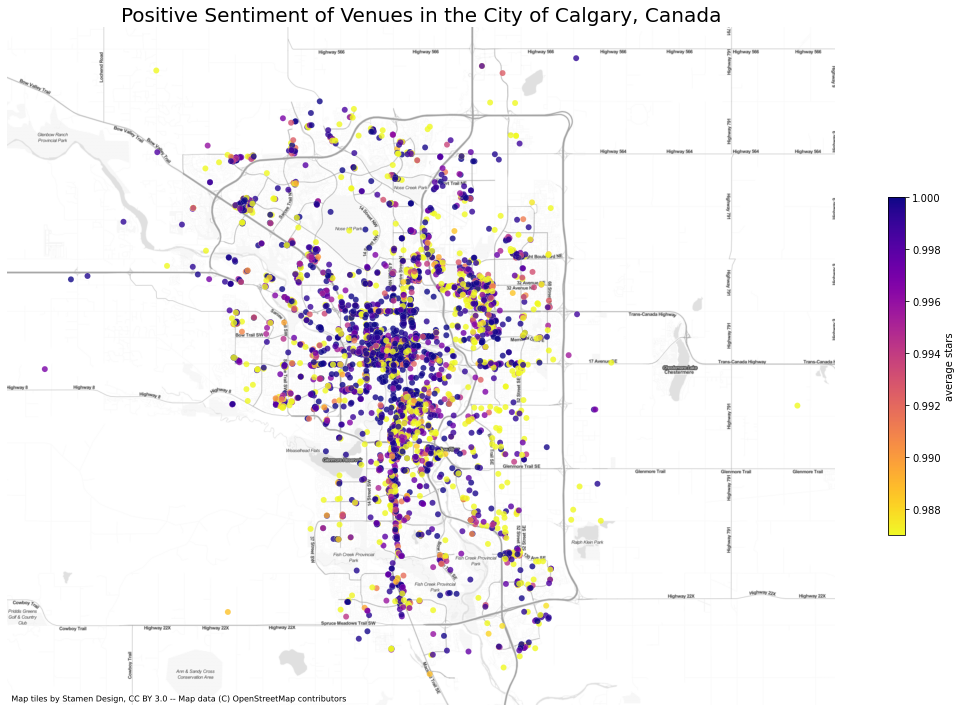

In [68]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf =gdf.set_crs(epsg=4326)
gdf =gdf.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
houseplot=gdf.plot(figsize=(8, 8), alpha=0.8, linewidth=0.1,
                edgecolor='w',ax=ax,
                column='Positive_sentiment', colormap = 'plasma_r',legend=True,vmin=0.987,vmax=1,
                legend_kwds={'label': "average stars",'shrink': 0.5})

# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.8)

ax.set_title("Positive Sentiment of Venues in the City of Calgary, Canada",fontsize= 20)

# this removes the axis
ax.set_axis_off()

# this tightens the layout
fig.tight_layout()

fig.savefig("figure/Positive Sentiment.png", bbox_inches='tight', pad_inches=0, dpi=300)

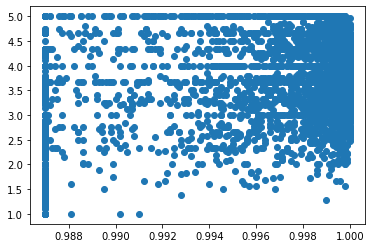

In [69]:
plt.scatter(df['Positive_sentiment'],df['stars_y'])
plt.show()

In [70]:
type(df) #pandas.core.frame.DataFrame
df.head(n=2)

,name,latitude,longitude,review_count,stars_y,useful,funny,cool,text,review,clean_text,clean_text_tag,categories,length,Positive_sentiment,geometry
index,,,,,,,,,,,,,,,,
0,007 Airsoft,51.082219,-114.009783,3.0,4.000000,2,1,0,[I've been in here a few times now and spent o...,I've been in here a few times now and spent ov...,i times spent them primarily two airsoft guns ...,i times spent them primarily two airsoft guns ...,3~4,2881,0.987,POINT (-114.00978 51.08222)
1,1 Pot,51.050175,-114.060360,36.0,3.277778,77,30,29,[Quality of food 4/5 yelps\nVariety 4/5 yelps ...,Quality of food 4/5 yelps\nVariety 4/5 yelps s...,quality food yelps\nvariety yelps see much lar...,quality food yelps\nvariety yelps see much lar...,3~4,33638,1.000,POINT (-114.06036 51.05018)


In [71]:
# import rpy2
import rpy2
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri, globalenv
from rpy2.robjects.packages import importr

# load baseR and various packages
base = importr('base')
utils = importr('utils')
stats = importr('stats')

print(base.R_home())

[1] "/Library/Frameworks/R.framework/Resources"



In [72]:
dflm = df[['review_count','useful','funny','cool','length',
         'Positive_sentiment','latitude','longitude','stars_y']]
# load the pandas dataframe as a R dataframe
pandas2ri.activate()
globalenv["dflm"] = dflm

In [73]:
dflm = dflm[dflm['review_count']<200]
dflm = dflm[dflm['useful']<300]
dflm = dflm[dflm['funny']<100]
dflm = dflm[dflm['cool']<100]
dflm = dflm[dflm['length']<120000]
len(dflm)

4281

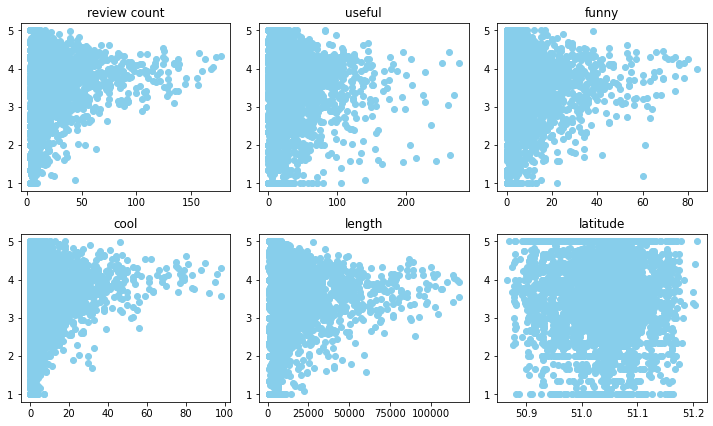

In [74]:
fig, ax = plt.subplots(2, 3,figsize=(10,6))  
ax[0][0].set_title('review count')
ax[0][0].scatter(dflm['review_count'],dflm['stars_y'],c='skyblue',marker='o')
ax[0][1].set_title('useful')
ax[0][1].scatter(dflm['useful'],dflm['stars_y'],c='skyblue',marker='o')
ax[0][2].set_title('funny')
ax[0][2].scatter(dflm['funny'],dflm['stars_y'],c='skyblue',marker='o')

ax[1][0].set_title('cool')
ax[1][0].scatter(dflm['cool'],dflm['stars_y'],c='skyblue',marker='o')
ax[1][1].set_title('length')
ax[1][1].scatter(dflm['length'],dflm['stars_y'],c='skyblue',marker='o')
ax[1][2].set_title('latitude')
ax[1][2].scatter(dflm['latitude'],dflm['stars_y'],c='skyblue',marker='o')

fig.tight_layout(pad=1.0)

In [75]:
from scipy.stats import skew
# function to get scaled X
def skewed_X(variables):
    X = dflm[variables]
    numeric_data=X.select_dtypes(include=[np.number])
    skewed = X[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))
    
    skewed = skewed[(skewed > 0.75)]
    skewed = skewed.index
    X[skewed] = np.log1p(X[skewed])
    return X

In [76]:
# function to check normalization

def skewed_hist(variables):
    X = skewed_X(variables)
    y = dflm[['stars_y']]
    hist = X.hist(bins=20,figsize=(15,2), color='lightblue',
                  xlabelsize=0,ylabelsize=0,grid=False, 
                  layout=(1,6))
    return hist

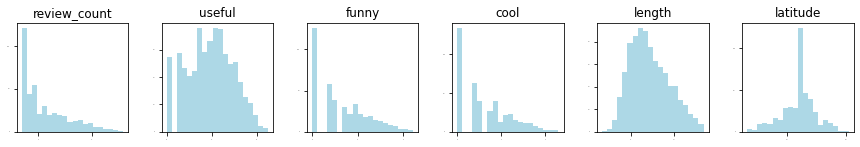

In [77]:
hist = skewed_hist(['review_count','useful','funny','cool','length','latitude'])

### Linear regression models

In [78]:
# runs lm() model from rpy2 
R = ro.r

rcode = """
fit2 <- lm('stars_y~review_count+useful+funny+cool+length', data=dflm)
print (summary(fit2))
"""
R(rcode)


Call:
lm(formula = "stars_y~review_count+useful+funny+cool+length", 
    data = dflm)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4072 -0.5278  0.0968  0.6789  3.1688 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.500e+00  1.726e-02 202.756  < 2e-16 ***
review_count  7.193e-03  1.208e-03   5.953 2.84e-09 ***
useful       -5.872e-03  6.979e-04  -8.414  < 2e-16 ***
funny        -9.035e-03  2.039e-03  -4.432 9.58e-06 ***
cool          2.619e-02  2.126e-03  12.321  < 2e-16 ***
length       -8.857e-06  1.752e-06  -5.056 4.46e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9417 on 4325 degrees of freedom
Multiple R-squared:  0.0683,	Adjusted R-squared:  0.06723 
F-statistic: 63.41 on 5 and 4325 DF,  p-value: < 2.2e-16



call,"Call: lm(formula = ""stars_y~review_count+useful+funny+cool+length"", data = dflm) Coefficients: (Intercept) review_count useful funny cool 3.500e+00 7.193e-03 -5.872e-03 -9.035e-03 2.619e-02 length -8.857e-06"
terms,"stars_y ~ review_count + useful + funny + cool + length attr(,""variables"") list(stars_y, review_count, useful, funny, cool, length) attr(,""factors"") review_count useful funny cool length stars_y 0 0 0 0 0 review_count 1 0 0 0 0 useful 0 1 0 0 0 funny 0 0 1 0 0 cool 0 0 0 1 0 length 0 0 0 0 1 attr(,""term.labels"") [1] ""review_count"" ""useful"" ""funny"" ""cool"" ""length"" attr(,""order"") [1] 1 1 1 1 1 attr(,""intercept"") [1] 1 attr(,""response"") [1] 1 attr(,"".Environment"") attr(,""predvars"") list(stars_y, review_count, useful, funny, cool, length) attr(,""dataClasses"") stars_y review_count useful funny cool length ""numeric"" ""numeric"" ""numeric"" ""numeric"" ""numeric"" ""numeric"""
residuals,[ 0.52497051 -0.21936528 -0.88746186 ... 0.26274688 -0.16353828 -1.27747686]
...,...
adj.r.squared,[0.06722676]
fstatistic,[ 63.41428487 5. 4325. ]
cov.unscaled,[[ 3.36002342e-04 -4.22753583e-06 -3.35339425e-06 -1.03077730e-06 6.75629036e-06 3.59418391e-10] [-4.22753583e-06 1.64639146e-06 2.58771468e-08 5.41945413e-07 -9.91880596e-07 -1.62854835e-09] [-3.35339425e-06 2.58771468e-08 5.49303393e-07 -5.58613784e-07 -2.67475959e-07 -3.63920812e-10] [-1.03077730e-06 5.41945413e-07 -5.58613784e-07 4.68757160e-06 -2.56643447e-06 -8.33605581e-10] [ 6.75629036e-06 -9.91880596e-07 -2.67475959e-07 -2.56643447e-06 5.09637131e-06 -1.66855219e-10] [ 3.59418391e-10 -1.62854835e-09 -3.63920812e-10 -8.33605581e-10 -1.66855219e-10 3.46089223e-12]]


In [79]:
# runs lm() model from rpy2 
R = ro.r

rcode = """
fit1 <- lm('stars_y~review_count+useful+funny+cool+length+Positive_sentiment', data=dflm)
print (summary(fit1))
"""
R(rcode)


Call:
lm(formula = "stars_y~review_count+useful+funny+cool+length+Positive_sentiment", 
    data = dflm)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1486 -0.5433 -0.0137  0.5479  3.1806 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -8.765e+01  2.547e+00 -34.416  < 2e-16 ***
review_count        3.820e-03  1.066e-03   3.585  0.00034 ***
useful             -6.459e-03  6.133e-04 -10.531  < 2e-16 ***
funny              -8.149e-03  1.791e-03  -4.550 5.51e-06 ***
cool                2.527e-02  1.868e-03  13.530  < 2e-16 ***
length             -1.225e-05  1.542e-06  -7.944 2.47e-15 ***
Positive_sentiment  9.170e+01  2.562e+00  35.791  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8272 on 4324 degrees of freedom
Multiple R-squared:  0.2812,	Adjusted R-squared:  0.2802 
F-statistic:   282 on 6 and 4324 DF,  p-value: < 2.2e-16



call,"Call: lm(formula = ""stars_y~review_count+useful+funny+cool+length+Positive_sentiment"", data = dflm) Coefficients: (Intercept) review_count useful funny -8.765e+01 3.820e-03 -6.459e-03 -8.149e-03 cool length Positive_sentiment 2.527e-02 -1.225e-05 9.170e+01"
terms,"stars_y ~ review_count + useful + funny + cool + length + Positive_sentiment attr(,""variables"") list(stars_y, review_count, useful, funny, cool, length, Positive_sentiment) attr(,""factors"") review_count useful funny cool length Positive_sentiment stars_y 0 0 0 0 0 0 review_count 1 0 0 0 0 0 useful 0 1 0 0 0 0 funny 0 0 1 0 0 0 cool 0 0 0 1 0 0 length 0 0 0 0 1 0 Positive_sentiment 0 0 0 0 0 1 attr(,""term.labels"") [1] ""review_count"" ""useful"" ""funny"" [4] ""cool"" ""length"" ""Positive_sentiment"" attr(,""order"") [1] 1 1 1 1 1 1 attr(,""intercept"") [1] 1 attr(,""response"") [1] 1 attr(,"".Environment"") attr(,""predvars"") list(stars_y, review_count, useful, funny, cool, length, Positive_sentiment) attr(,""dataClasses"") stars_y review_count useful funny ""numeric"" ""numeric"" ""numeric"" ""numeric"" cool length Positive_sentiment ""numeric"" ""numeric"" ""numeric"""
residuals,[ 1.18740984 -0.48833648 -1.06269957 ... -0.15408996 -0.12870724 -1.58612751]
...,...
adj.r.squared,[0.28024106]
fstatistic,[ 281.98383622 6. 4324. ]
cov.unscaled,[[ 9.48046674e+00 3.46504227e-04 5.76762562e-05 -9.31646505e-05 1.02948946e-04 3.53084516e-07 -9.53732009e+00] [ 3.46504227e-04 1.65936731e-06 2.81350310e-08 5.38536781e-07 -9.88321804e-07 -1.61549876e-09 -3.52847570e-04] [ 5.76762562e-05 2.81350310e-08 5.49696280e-07 -5.59206909e-07 -2.66856705e-07 -3.61650096e-10 -6.13978147e-05] [-9.31646505e-05 5.38536781e-07 -5.59206909e-07 4.68846702e-06 -2.56736933e-06 -8.37033585e-10 9.26896752e-05] [ 1.02948946e-04 -9.88321804e-07 -2.66856705e-07 -2.56736933e-06 5.09734735e-06 -1.63276200e-10 -9.67729424e-05] [ 3.53084516e-07 -1.61549876e-09 -3.61650096e-10 -8.37033585e-10 -1.63276200e-10 3.47401600e-12 -3.54852928e-07] [-9.53732009e+00 -3.52847570e-04 -6.13978147e-05 9.26896752e-05 -9.67729424e-05 -3.54852928e-07 9.59485443e+00]]
